In today's data-centric world, the field of data science has become a driving force behind innovation and critical decision-making across industries. This notebook is dedicated to exploring and analyzing salary trends in the dynamic field of data science. Our objective is to gain valuable insights into the factors that influence salaries in this rapidly growing domain.

## Data Exploration and Preprocessing:

## Import necessary libraries 

In [1]:
!pip install country_converter

In [2]:
import pandas as pd
import numpy as np


import country_converter as coco

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
# Set the default color palette and default style
sns.set_palette("deep")
# sns.set_style("whitegrid")

## Load the dataset

In [4]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
df.shape

(3755, 11)

### Missing values

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no missing values in this dataset.
### Duplicating Values:

In [8]:
df.duplicated().sum()

1171

In [9]:
# drop the duplicated rows
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(2584, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Data cleaning

In [13]:
# drop 2 columns:  'salary' and 'salary_currency'  
df.drop(['salary'], axis=1, inplace=True)

# rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [14]:
# Inflation rates
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

# Apply the function to the dataset
df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

#------------
#credit : @rrrrrrita
#https://www.kaggle.com/code/tumpanjawat/ds-salary-full-eda-geo-prediction
#------------


In [15]:
df.describe()

,work_year,salary,remote_ratio,adjusted_salary
count,2584.000000,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746,138560.259727
std,0.749179,67136.837329,48.163707,69092.951905
min,2020.000000,5132.000000,0.000000,5583.616000
25%,2022.000000,84975.000000,0.000000,89460.000000
50%,2022.000000,130000.000000,50.000000,134318.173494
75%,2023.000000,175000.000000,100.000000,181050.000000
max,2023.000000,450000.000000,100.000000,507946.579425


In [16]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Junior',
    'EX': 'Executive',
    'MI': 'Mid-level',
})

In [17]:
converted_country = coco.convert(names=df['employee_residence'], to="name")
df['employee_residence'] = converted_country

In [18]:
converted_location = coco.convert(names=df['company_location'], to="name")
df['company_location'] = converted_country

In [19]:
df['company_location'] = np.where(df['company_location']=='Puerto Rico','United States',df['company_location'])

In [20]:
df['remote_ratio'].value_counts()

100    1211
0      1186
50      187
Name: remote_ratio, dtype: int64

In [21]:
df['job_mode'] = df['remote_ratio'].replace({0: 'onsite', 50: 'hybrid', 100:'remote'})

In [22]:
#df.job_title.unique()
def assign_broader_category(job_title):
    data_scientist = ['Principal Data Scientist','Data Scientist','Applied Scientist','Applied Data Scientist',
 'Data Science Manager','Director of Data Science', 'Lead Data Scientist',
 'Data Science Lead', 'Data Science Consultant','Head of Data Science',
 'Data Science Engineer', 'Data Science Tech Lead', 'Data Scientist Lead',
 'Product Data Scientist','Staff Data Scientist'
]
    data_engineer = [ 'Data Modeler', 'Data Strategist', 'Data Engineer', 'Data Architect', 'Data DevOps Engineer',
  'Head of Data',  'Data Manager','Data Operations Engineer','Azure Data Engineer',
  'Big Data Engineer', 'Cloud Database Engineer','Marketing Data Engineer', 'Data Lead', 
  'Data Infrastructure Engineer', 'Software Data Engineer','Data Specialist', 
  'BI Data Engineer','BI Developer','Big Data Architect','Cloud Data Engineer', 
  'Data Operations Analyst', 'Power BI Developer','Principal Data Architect', 
  'Cloud Data Architect', 'Lead Data Engineer','Principal Data Engineer']
#     machine_learning= ['ML Engineer','Machine Learning Engineer',
#  'Applied Machine Learning Engineer','Machine Learning Researcher','Machine Learning Scientist',
#  'MLOps Engineer', 'AI Scientist','AI Developer','Applied Machine Learning Scientist',
#  'AI Programmer','Deep Learning Researcher',  'Machine Learning Infrastructure Engineer',
#  'Deep Learning Engineer', 'Machine Learning Software Engineer','Machine Learning Research Engineer',
#  'NLP Engineer','Machine Learning Developer', 'Principal Machine Learning Engineer',
#  'Machine Learning Manager', 'Lead Machine Learning Engineer','Head of Machine Learning',
# ]
    data_analyst = ['Data Analyst','Analytics Engineer','Data Quality Analyst','Compliance Data Analyst',
 'Data Analytics Manager','Business Data Analyst','Staff Data Analyst',
 'Lead Data Analyst','Financial Data Analyst','BI Analyst','Product Data Analyst', 
 'Data Analytics Lead', 'Data Analytics Specialist','BI Data Analyst','Insight Analyst',
 'Data Analytics Engineer','Data Analytics Consultant', 'Marketing Data Analyst',
 'Principal Data Analyst', 'Finance Data Analyst']
    if job_title in data_engineer:
        return "Data Engineer"
    elif job_title in data_scientist:
        return "Data Scientist"
#     elif job_title in machine_learning:
#         return "ML Engineer"
    elif job_title in data_analyst:
        return "Data Analyst"
    else:
        return "Machine-learning & Other"
    
                 
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [23]:
df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})

In [24]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size,adjusted_salary,job_mode,job_category
0,2023,Senior,Full-time,Principal Data Scientist,EUR,85847,Spain,100,Spain,Large,85847.0,remote,Data Scientist
1,2023,Mid-level,Contractor,ML Engineer,USD,30000,United States,100,United States,Small,30000.0,remote,Machine-learning & Other
2,2023,Mid-level,Contractor,ML Engineer,USD,25500,United States,100,United States,Small,25500.0,remote,Machine-learning & Other
3,2023,Senior,Full-time,Data Scientist,USD,175000,Canada,100,Canada,Medium,175000.0,remote,Data Scientist
4,2023,Senior,Full-time,Data Scientist,USD,120000,Canada,100,Canada,Medium,120000.0,remote,Data Scientist


## Exploratory Data Analysis (EDA):

###  What is the overall distribution of data science salaries?

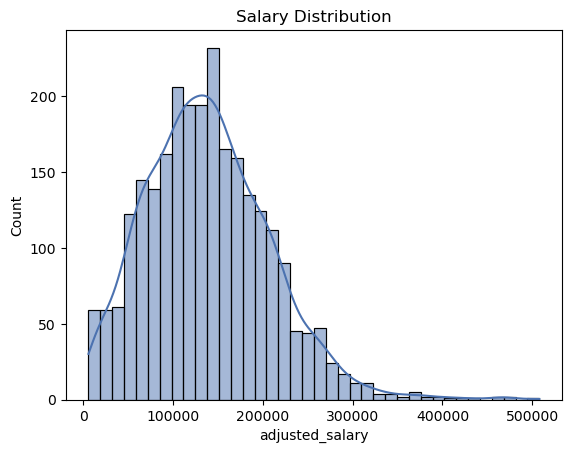

In [25]:
ax = sns.histplot(df['adjusted_salary'], kde = True)
ax.set_title('Salary Distribution')
plt.show()

## Experience level¶
#### 1. How do salaries vary based on different levels of experience or years in the field?
#### 2. Which experience level has the highest hiring?

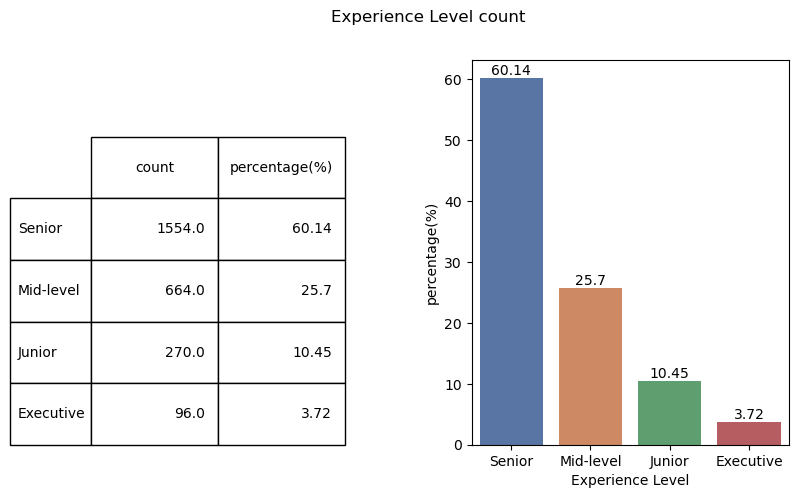

In [26]:
temp = df['experience_level'].value_counts().to_frame()
temp.columns = ['count']
temp['percentage(%)'] =round(100 * df['experience_level'].value_counts(normalize= True),2)

fig = plt.figure(figsize=(9,5))
ax1 = plt.subplot(121)
ax1.axis('off')
bbox =[0,0,0.8,0.8]
ax1.table(cellText = temp.values, rowLabels=temp.index, colLabels=temp.columns,bbox=bbox)
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(data = temp, x=temp.index,y=temp['percentage(%)'])
ax2.bar_label(ax2.containers[0])
# plt.xticks(rotation= 30)
plt.xlabel('Experience Level')
plt.suptitle('Experience Level count')
plt.show()

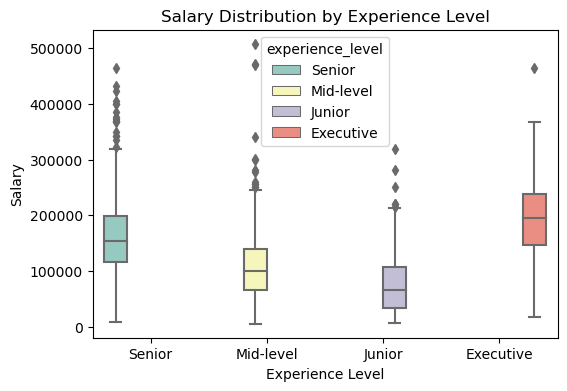

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='experience_level', y='adjusted_salary',hue='experience_level', palette='Set3')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

In [28]:
px.box(df, x= 'experience_level', y = 'adjusted_salary', 
       color= 'experience_level',title= 'Salary Distribution by Experience Level',
       width=600, height=400)

As expected, the demand for experienced professionals is typically higher compared to entry-level positions. The job market reflects this trend with a greater number of job listings available for senior-level roles. While approximately 10.45% of the job listings are for junior positions, the majority (60.14%) of the listings are for senior-level roles, which correspond to the second highest median salaries. Entry-level or junior positions are offered lower salaries in comparison to more experienced professionals such as senior and executive-level roles.
### Now, which role are senior leveled generally hired for?

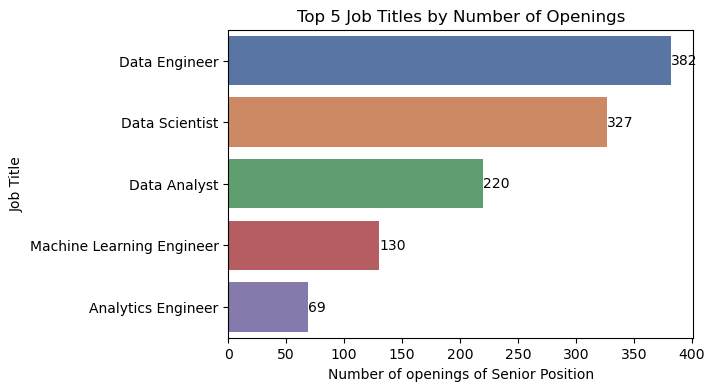

In [29]:
temp = df.loc[df['experience_level']== 'Senior','job_title'].value_counts()[:5].to_frame()
temp.columns = ['count']

plt.figure(figsize=(6,4))

ax= sns.barplot(data = temp, y =  temp.index, x= temp['count'])
plt.ylabel('Job Title')
plt.xlabel('Number of openings of Senior Position')
plt.title('Top 5 Job Titles by Number of Openings')
ax.bar_label(ax.containers[0], fmt = '%d')
plt.show()

### Which types of employment do employers like to hire?

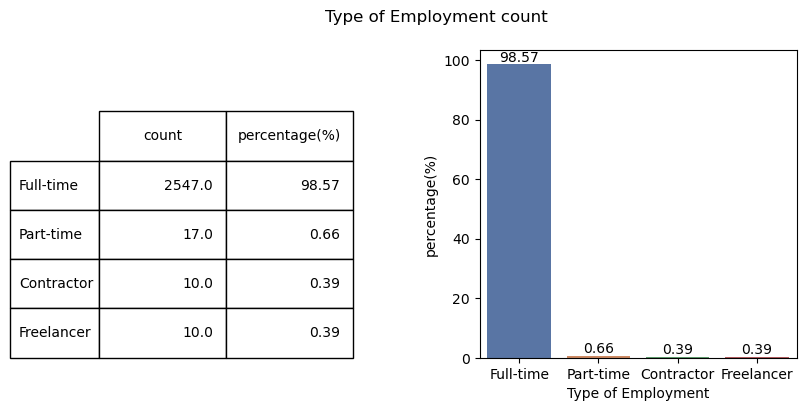

In [30]:
employment = df['employment_type'].value_counts().to_frame()
employment.columns = ['count']
employment['percentage(%)'] =round(100 * df['employment_type'].value_counts(normalize= True),2)

fig = plt.figure(figsize=(9,4))
ax1 = plt.subplot(121)
ax1.axis('off')
bbox =[0,0,0.8,0.8]
ax1.table(cellText = employment.values, rowLabels=employment.index, colLabels=employment.columns,bbox=bbox)
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(data = employment, x=employment.index,y=employment['percentage(%)'])
ax2.bar_label(ax2.containers[0])
# plt.xticks(rotation= 30)
plt.xlabel('Type of Employment')
plt.suptitle('Type of Employment count')
plt.show()

Employers typically favor hiring individuals for full-time employment over part-time and other roles. Nearly all job listings, specifically around 99%, are full-time employment.

## Job Role
### 1. Which job roles are most popular  in data science?
### 2. Which role has the highest salary employment wise? 

In [31]:
print('There are {} job titles in this dataset.'.format(len(df['job_title'].value_counts())))

There are 93 job titles in this dataset.


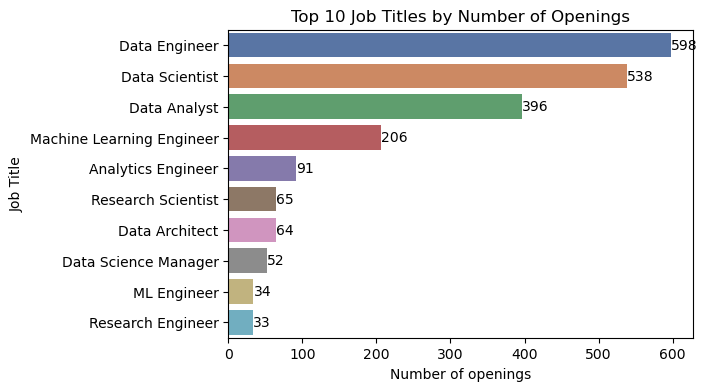

In [32]:
temp = df['job_title'].value_counts()[:10].to_frame()
temp.columns = ['count']

plt.figure(figsize=(6,4))

ax= sns.barplot(data = temp, y =  temp.index, x= temp['count'])
plt.ylabel('Job Title')
plt.xlabel('Number of openings')
plt.title('Top 10 Job Titles by Number of Openings')
ax.bar_label(ax.containers[0], fmt = '%d')
plt.show()

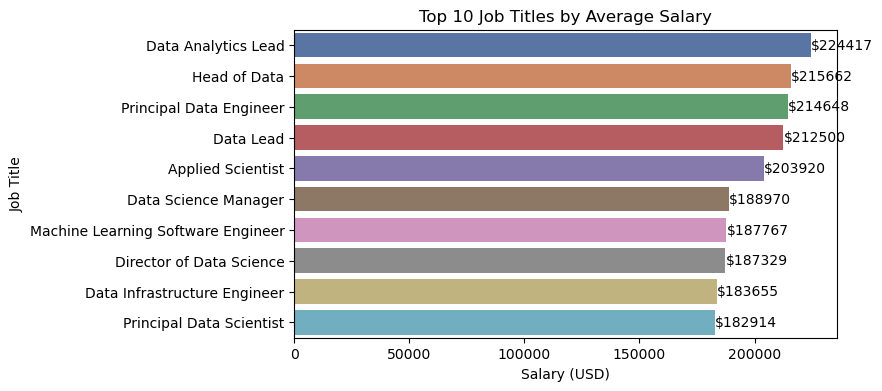

In [33]:
temp = df.groupby('job_title')['adjusted_salary'].median().round(2).sort_values(ascending=False)
role_count = df['job_title'].value_counts()
temp = temp[role_count[role_count > 1].index].sort_values(ascending = False)[:10].to_frame()

plt.figure(figsize=(7,4))

ax = sns.barplot(data = temp, y=temp.index,x=temp['adjusted_salary'])
plt.ylabel('Job Title')
plt.xlabel('Salary (USD)')
plt.title('Top 10 Job Titles by Average Salary')
ax.bar_label(ax.containers[0], fmt = '$%d')
plt.show()

Across the data science field, roles such as Data Lead (\\$212500) and Data Analytics Lead  (\\$211254) command some of the highest average salaries.

### Are there any significant salary differences between data scientists and other related roles such as data analysts or data engineers?

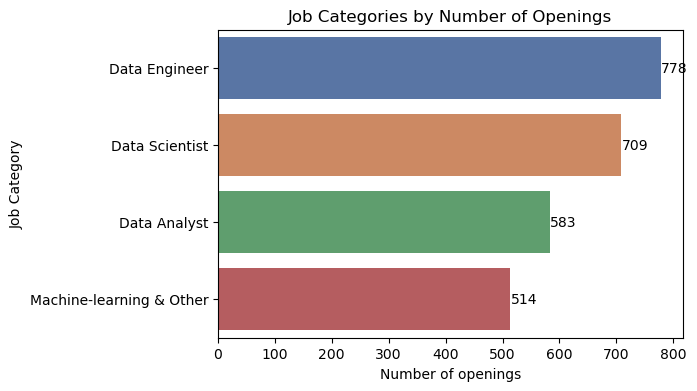

In [34]:
temp = df['job_category'].value_counts().to_frame()
temp.columns = ['count']

plt.figure(figsize=(6,4))

ax= sns.barplot(data = temp, y =  temp.index, x= temp['count'])
plt.ylabel('Job Category')
plt.xlabel('Number of openings')
plt.title('Job Categories by Number of Openings')
ax.bar_label(ax.containers[0], fmt = '%d')
plt.show()

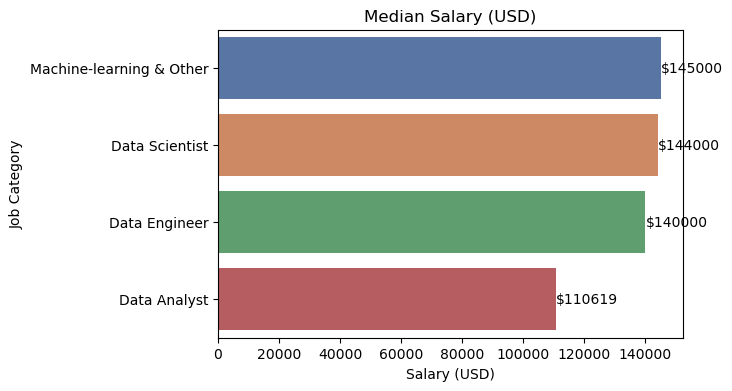

In [35]:
top_avg_salary = df.groupby('job_category')['adjusted_salary'].median().round(2).sort_values(ascending=False)
role_count = df['job_category'].value_counts()
top10_avg_salary = top_avg_salary[role_count[role_count > 1].index].sort_values(ascending = False)[:10].to_frame()

plt.figure(figsize=(6,4))

ax = sns.barplot(data = top10_avg_salary, y=top10_avg_salary.index,
                 x=top10_avg_salary['adjusted_salary'])
plt.ylabel('Job Category')
plt.xlabel('Salary (USD)')
plt.title('Median Salary (USD)')
ax.bar_label(ax.containers[0], fmt = '$%d')
plt.show()

Machine learning engineers and others typically enjoy higher salaries compared to data scientists and analysts. However, it is worth noting that machine learning engineering roles have a lower number of job listings compared to data scientists and analysts. This combination of higher salaries and relatively fewer job listings suggests that machine learning engineering positions are competitive in the job market.

### Which modes of employment has more average salary?

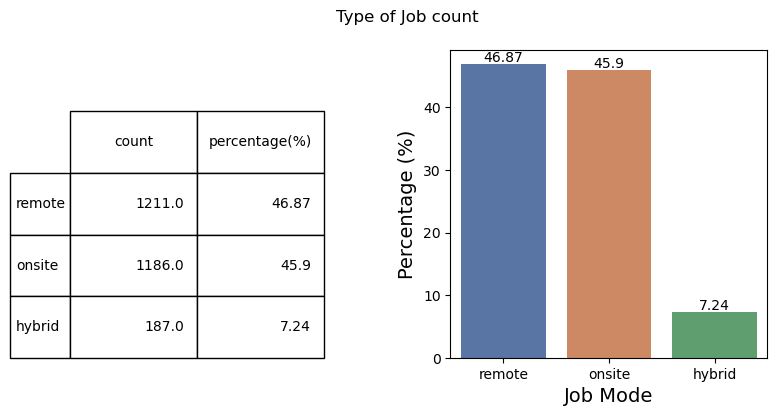

In [36]:
temp = df['job_mode'].value_counts().to_frame()
temp.columns = ['count']
temp['percentage(%)'] =round(100 * df['job_mode'].value_counts(normalize= True),2)

fig = plt.figure(figsize=(9,4))
ax1 = plt.subplot(121)
ax1.axis('off')
bbox =[0,0,0.8,0.8]
ax1.table(cellText = temp.values, rowLabels=temp.index, colLabels=temp.columns,bbox=bbox)
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(data = temp, x=temp.index,y=temp['percentage(%)'])
ax2.bar_label(ax2.containers[0])
# plt.xticks(rotation= 30)
plt.xlabel('Job Mode', fontdict={'fontsize':14})
plt.ylabel('Percentage (%)', fontdict={'fontsize':14})

plt.suptitle('Type of Job count')
plt.show()

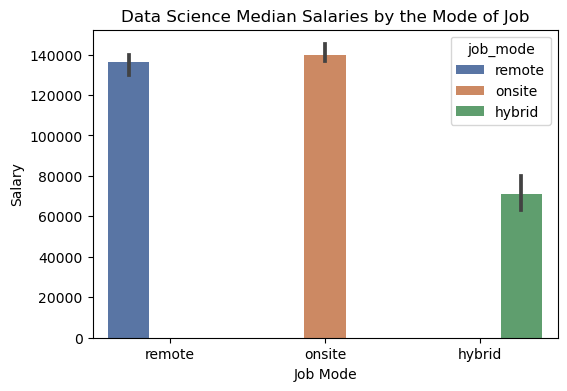

In [37]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='job_mode', y='adjusted_salary', hue='job_mode',estimator='median')
plt.title('Data Science Median Salaries by the Mode of Job')
plt.xlabel('Job Mode')
plt.ylabel('Salary')
plt.show()

In [38]:
px.box(df,x='job_mode',y='adjusted_salary',color='job_mode',
            title='Data Science Salaries by the Type of Job',width=600, height=400)

Both onsite and remote job listings exhibit a nearly equal distribution in the present job market. Furthermore, the salaries for these employment modes are also quite similar, with minimal disparity between them. This indicates that professionals have comparable opportunities and earning potential regardless of whether they choose an onsite or remote work arrangement.

### Company Location
#### Does the location or geographic region impact data science salaries? 
#### Which countries pay the highest for which roles?

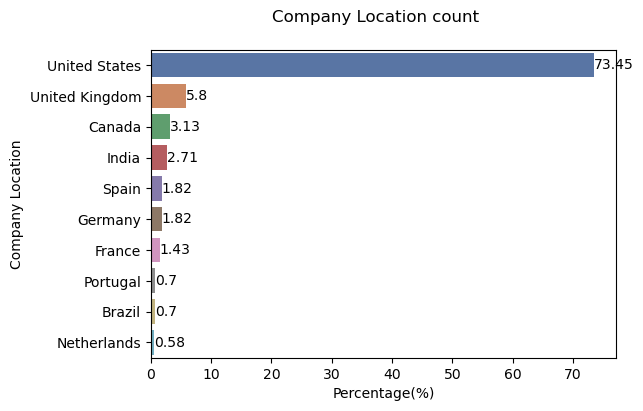

In [39]:
temp = df['company_location'].value_counts()[:10].to_frame()
temp.columns = ['count']
temp['percentage(%)'] =round(100 * df['company_location'].value_counts(normalize= True),2)

plt.figure(figsize=(6,4))
ax2 = sns.barplot(data = temp, y=temp.index,x=temp['percentage(%)'])
ax2.bar_label(ax2.containers[0])
# plt.xticks(rotation= 30)
plt.ylabel('Company Location')
plt.xlabel('Percentage(%)')
plt.suptitle('Company Location count')
plt.show()

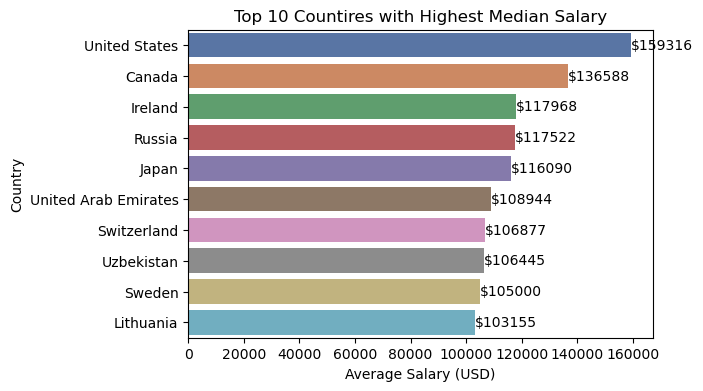

In [40]:
top_avg_salary = df.groupby('company_location')['adjusted_salary'].mean().round(2).sort_values(ascending=False)
role_count = df['company_location'].value_counts()
top10_avg_salary = top_avg_salary[role_count[role_count > 1].index].sort_values(ascending = False)[:10].to_frame()

plt.figure(figsize=(6,4))

ax = sns.barplot(data = top10_avg_salary, y=top10_avg_salary.index,
                 x=top10_avg_salary['adjusted_salary'])
plt.ylabel('Country')
plt.xlabel('Average Salary (USD)')
plt.title('Top 10 Countires with Highest Median Salary')
ax.bar_label(ax.containers[0], fmt = '$%d')
plt.show()

The vast majority of job listings in the field of data science are concentrated in the United States, indicating a strong demand and thriving market for data science professionals in the country. Data science job salaries in the United States are also significantly higher compared to those in other countries.

## Company Size
### How does the size of the company or organization influence data science salaries?


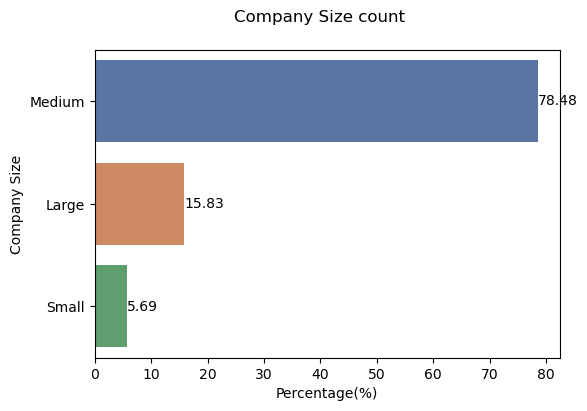

In [41]:
temp = df['company_size'].value_counts()[:10].to_frame()
temp.columns = ['count']
temp['percentage(%)'] =round(100 * df['company_size'].value_counts(normalize= True),2)

plt.figure(figsize=(6,4))
ax2 = sns.barplot(data = temp, y=temp.index,x=temp['percentage(%)'])
ax2.bar_label(ax2.containers[0])
plt.ylabel('Company Size')
plt.xlabel('Percentage(%)')
plt.suptitle('Company Size count')
plt.show()

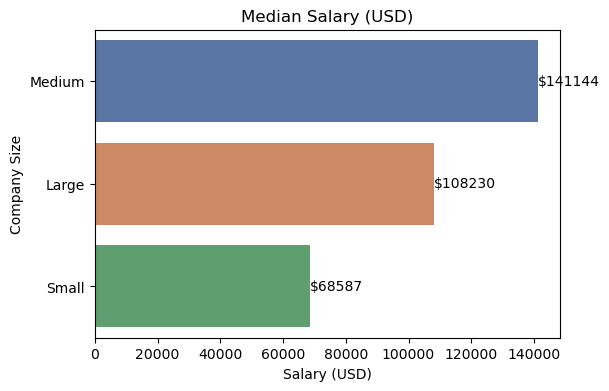

In [42]:
top_avg_salary = df.groupby('company_size')['adjusted_salary'].median().round(2).sort_values(ascending=False)
role_count = df['company_size'].value_counts()
top10_avg_salary = top_avg_salary[role_count[role_count > 1].index].sort_values(ascending = False)[:10].to_frame()

plt.figure(figsize=(6,4))

ax = sns.barplot(data = top10_avg_salary, y=top10_avg_salary.index,
                 x=top10_avg_salary['adjusted_salary'], palette='deep')
plt.ylabel('Company Size')
plt.xlabel('Salary (USD)')
plt.title('Median Salary (USD)')
ax.bar_label(ax.containers[0], fmt = '$%d')
plt.show()

Medium-sized companies not only offer the highest median salaries compared to small or large organizations but also dominate the job market with a significant majority of job listings

## Experience level and Job Category

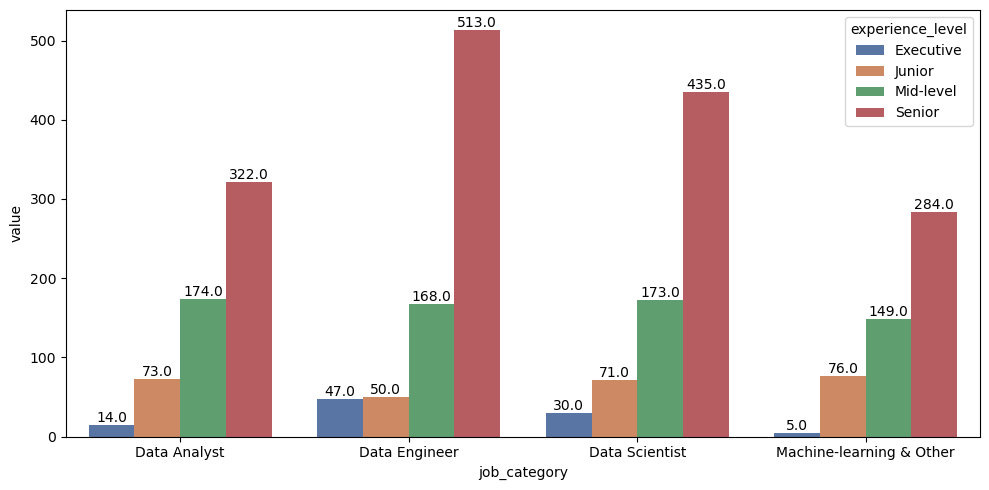

In [43]:
temp = df.groupby(['experience_level','job_category']).size().reset_index()
temp.columns = ['experience_level','job_category', 'value']
plt.figure(figsize=(10,5))
ax = sns.barplot(data = temp, x=temp['job_category'], y=temp['value'],
            hue=temp['experience_level'])
for bars in ax.containers:
        ax.bar_label(bars, fmt='%.1f')
plt.tight_layout()
plt.show()

### Key Insights:
- The data science job market favors experienced professionals, with a greater number of job listings and higher median salaries for senior-level roles.

- Both onsite and remote job opportunities are evenly distributed, with similar salary ranges, providing comparable earning potential regardless of the work arrangement.

- The United States stands out as the dominant player in the data science job market, with a strong demand and higher salaries compared to other countries. 

- Medium-sized companies offer the highest median salaries and have a significant presence in the job market in terms of job listings.
